<a href="https://colab.research.google.com/github/YoonieJang/CS484_Machine-Learning/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as stats
import sympy
import scipy
import numpy
from sklearn import metrics
from sklearn.model_selection import train_test_split
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import sklearn.tree as tree
import graphviz
from itertools import combinations 
from google.colab import files
import io

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
data= pd.read_csv(io.BytesIO(uploaded['100Values.csv']))

Saving 100Values.csv to 100Values.csv


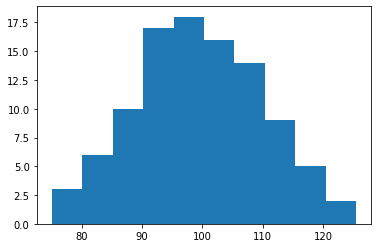

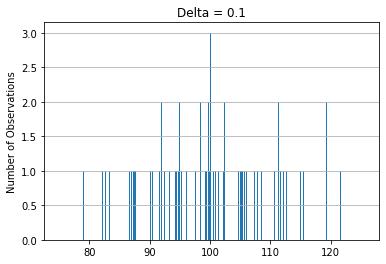

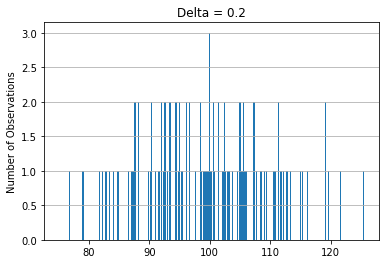

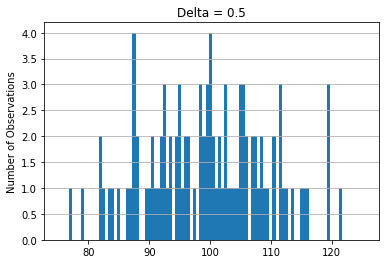

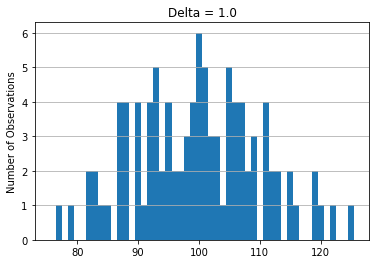

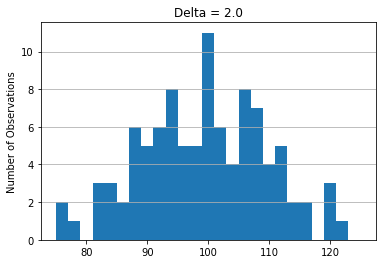

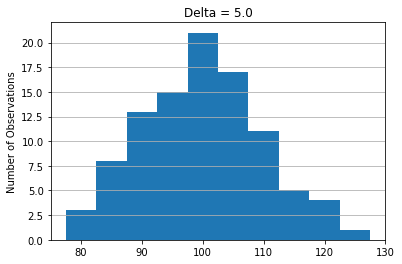

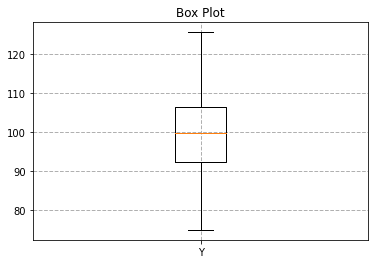

   Delta   C(Delta)  Low Y  Middle Y  High Y  N Bin
0    0.1  21.043753   75.0      99.5   125.5  505.0
1    0.2  11.001411   75.0      99.4   125.6  253.0
2    0.5   4.758136   75.0      99.5   125.5  101.0
3    1.0   1.497448   75.0      99.0   126.0   51.0
4    2.0   0.205849   74.0     100.0   126.0   26.0
5    5.0  -0.796033   75.0     100.0   130.0   11.0


In [ ]:
#q7
Y = data['x']
plt.hist(Y)
plt.show()

def calcCD (Y, delta):
   maxY = numpy.max(Y)
   minY = numpy.min(Y)
   meanY = numpy.mean(Y)

   # Round the mean to integral multiples of delta
   middleY = delta * numpy.round(meanY / delta)

   # Determine the number of bins on both sides of the rounded mean
   nBinRight = numpy.ceil((maxY - middleY) / delta)
   nBinLeft = numpy.ceil((middleY - minY) / delta)
   lowY = middleY - nBinLeft * delta

   # Assign observations to bins starting from 0
   m = nBinLeft + nBinRight
   BIN_INDEX = 0;
   boundaryY = lowY
   for iBin in numpy.arange(m):
      boundaryY = boundaryY + delta
      BIN_INDEX = numpy.where(Y > boundaryY, iBin+1, BIN_INDEX)

   # Count the number of observations in each bins
   uBin, binFreq = numpy.unique(BIN_INDEX, return_counts = True)

   # Calculate the average frequency
   meanBinFreq = numpy.sum(binFreq) / m
   ssDevBinFreq = numpy.sum((binFreq - meanBinFreq)**2) / m
   CDelta = (2.0 * meanBinFreq - ssDevBinFreq) / (delta * delta)
   return(m, middleY, lowY, CDelta)

result = pd.DataFrame()
deltaList = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]

for d in deltaList:
   nBin, middleY, lowY, CDelta = calcCD(Y,d)
   highY = lowY + nBin * d
   result = result.append([[d, CDelta, lowY, middleY, highY, nBin]], ignore_index = True)

   binMid = lowY + 0.5 * d + numpy.arange(nBin) * d
   plt.hist(Y, bins = binMid, align='mid')
   plt.title('Delta = ' + str(d))
   plt.ylabel('Number of Observations')
   plt.grid(axis = 'y')
   plt.show()
   
result = result.rename(columns = {0:'Delta', 1:'C(Delta)', 2:'Low Y', 3:'Middle Y', 4:'High Y', 5:'N Bin'})
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot(Y, labels = ['Y'])
ax1.grid(linestyle = '--', linewidth = 1)
plt.show()
print(result)


In [ ]:
#q13,14,15
dt = {
  'feature':[],
  'target':[]}

,feature,A,B,C,D,E
0,1,65,304,530,487,140
1,2,74,185,160,55,16
2,3,33,228,623,755,363
3,4,90,290,349,213,40


In [ ]:
dt= {"Feature": [], "Target": []}
dt["Feature"].extend(["I"]*65)
dt["Target"].extend([1]*65)
dt["Feature"].extend(["I"]*304)
dt["Target"].extend([2]*304)
dt["Feature"].extend(["I"]*530)
dt["Target"].extend([3]*530)
dt["Feature"].extend(["I"]*487)
dt["Target"].extend([4]*487)
dt["Feature"].extend(["I"]*140)
dt["Target"].extend([5]*140)
    
dt["Feature"].extend(["II"]*490)
dt["Target"].extend([1]*74)
dt["Target"].extend([2]*185)
dt["Target"].extend([3]*160)
dt["Target"].extend([4]*55)
dt["Target"].extend([5]*16)
    
dt["Feature"].extend(["III"]*2002)
dt["Target"].extend([1]*33)
dt["Target"].extend([2]*228)
dt["Target"].extend([3]*623)
dt["Target"].extend([4]*755)
dt["Target"].extend([5]*363)
    
dt["Feature"].extend(["IV"]*982)
dt["Target"].extend([1]*90)
dt["Target"].extend([2]*290)
dt["Target"].extend([3]*349)
dt["Target"].extend([4]*213)
dt["Target"].extend([5]*40)
df=pd.DataFrame(dt)
df

,Feature,Target
0,I,1
1,I,1
2,I,1
3,I,1
4,I,1
...,...,...
4995,IV,5
4996,IV,5
4997,IV,5
4998,IV,5


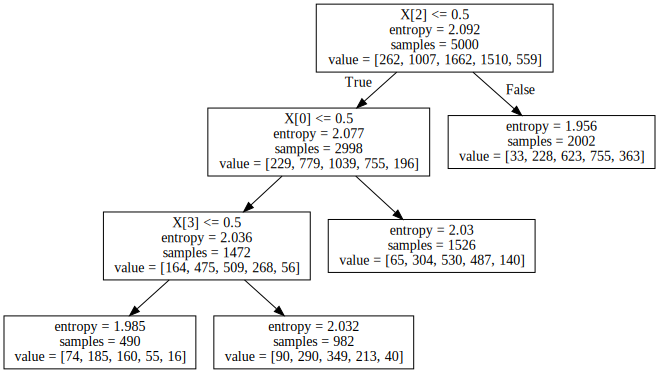

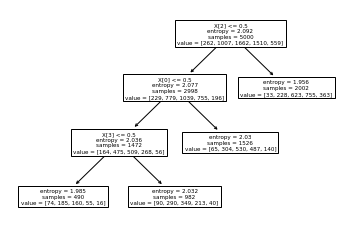

In [ ]:
tar=df[['Target']].astype('category')
of = pd.get_dummies(df[['Feature']])
md=tree.DecisionTreeClassifier(criterion='entropy')

md=md.fit(of,tar)
tree.plot_tree(md)
dot_data = tree.export_graphviz(md, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [ ]:
def EntropyIntervalSplit (
   inData,          # input data frame (predictor in column 0 and target in column 1)
   split):          # split value

   dataTable = inData
   dataTable['LE_Split'] = (dataTable.iloc[:,0] <= split)

   crossTable = pandas.crosstab(index = dataTable['LE_Split'], columns = dataTable.iloc[:,1], margins = True, dropna = True)   
   print(crossTable)

   nRows = crossTable.shape[0]
   nColumns = crossTable.shape[1]
   
   tableEntropy = 0
   for iRow in range(nRows-1):
      rowEntropy = 0
      for iColumn in range(nColumns):
         proportion = crossTable.iloc[iRow,iColumn] / crossTable.iloc[iRow,(nColumns-1)]
         if (proportion > 0):
            rowEntropy -= proportion * numpy.log2(proportion)
      print('Row = ', iRow, 'Entropy =', rowEntropy)
      print(' ')
      tableEntropy += rowEntropy *  crossTable.iloc[iRow,(nColumns-1)]
   tableEntropy = tableEntropy /  crossTable.iloc[(nRows-1),(nColumns-1)]
  
   return(tableEntropy)

In [ ]:
#q16
train_x=[0, 0, 0, 0, 1, 1 ,1 ,1 ,2 ,2 ,2 ,2 ,3 ,3 ,3 ,3 ,4 ,4 ,4 ,4]
train_y=[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,1]
test_x=[0 ,1 ,2 ,3 ,4]
test_y=[1 ,0 ,1 ,0 ,1]
train16 = {"x":train_x,"y":train_y}
test16 = {"x":test_x,"y":test_y}

In [ ]:
traindf=pd.DataFrame(train16)
testdf=pd.DataFrame(test16)
y=traindf["y"].astype('category')
y_category = y.cat.categories

x=traindf[["x"]]
x=stats.add_constant(x,prepend=True)

logit= stats.MNLogit(y,x)
thisFit = logit.fit(method="newton",full_output=True, Maxiter=100,tol=1e-8)
print(thisFit.summary())

Optimization terminated successfully.
         Current function value: 0.380497
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   20
Model:                        MNLogit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 11 Mar 2021   Pseudo R-squ.:                  0.3771
Time:                        11:44:13   Log-Likelihood:                -7.6099
converged:                       True   LL-Null:                       -12.217
Covariance Type:            nonrobust   LLR p-value:                  0.002401
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5047      2.000     -2.253      0.024      -8.424      -0.586
x              1.4675      0.

In [ ]:
test_x = testdf[["x"]]
test_x=stats.add_constant(test_x,prepend=True)
y_predProb = thisFit.predict(test_x)
print(y_predProb)

          0         1
0  0.989064  0.010936
1  0.954229  0.045771
2  0.827752  0.172248
3  0.525554  0.474446
4  0.203402  0.796598


In [ ]:

uploaded = files.upload()
data2= pd.read_csv(io.BytesIO(uploaded['ChicagoCompletedPotHole.csv']))
#q17-18
data2= data2[['N_POTHOLES_FILLED_ON_BLOCK','N_DAYS_FOR_COMPLETION','LATITUDE','LONGITUDE']]
data2[["N_POTHOLES_FILLED_ON_BLOCK"]]=numpy.log(data2[["N_POTHOLES_FILLED_ON_BLOCK"]])
data2[["N_DAYS_FOR_COMPLETION"]]=numpy.log(1+data2[["N_DAYS_FOR_COMPLETION"]])
data2

Saving ChicagoCompletedPotHole.csv to ChicagoCompletedPotHole.csv


,N_POTHOLES_FILLED_ON_BLOCK,N_DAYS_FOR_COMPLETION,LATITUDE,LONGITUDE
0,2.484907,0.693147,41.928307,-87.681971
1,2.833213,0.693147,41.763367,-87.700190
2,3.688879,0.693147,41.762503,-87.700460
3,3.610918,0.693147,41.795090,-87.586359
4,0.693147,0.000000,41.949208,-87.728091
...,...,...,...,...
17907,1.945910,3.401197,41.880145,-87.664531
17908,1.791759,3.258097,41.886026,-87.755126
17909,1.098612,3.178054,41.874958,-87.754786
17910,2.397895,3.663562,41.879804,-87.666897


In [ ]:
# Determine the number of clusters using the Silhouette metrics
nClusters = numpy.zeros(10)
Elbow = numpy.zeros(10)
Silhouette = numpy.zeros(10)
nObs = data2.shape[0]

for c in range(10):
   KClusters = c + 1
   nClusters[c] = KClusters

   kmeans = cluster.KMeans(n_clusters=KClusters, random_state=20201014).fit(data2)

   if (KClusters > 1):
       Silhouette[c] = metrics.silhouette_score(data2, kmeans.labels_)

   WCSS = numpy.zeros(KClusters)
   nC = numpy.zeros(KClusters)

   for i in range(nObs):
      k = kmeans.labels_[i]
      nC[k] += 1
      diff = data2.iloc[i,] - kmeans.cluster_centers_[k]
      WCSS[k] += diff.dot(diff)

   Elbow[c] = 0
   for k in range(KClusters):
      Elbow[c] += WCSS[k] / nC[k]
    
print("Cluster Size  Elbow Value   Silhouette Value: \n")
for c in range(10):
   print(nClusters[c],"   ", Elbow[c],"   ", Silhouette[c])

Cluster Size  Elbow Value   Silhouette Value: 

1.0     2.634715146308306     0.0
2.0     3.1610220818837664     0.3938776204354808
3.0     3.1037740102940647     0.3962796685338218
4.0     2.7189805380518983     0.41228890153479497
5.0     2.742168289991279     0.38269669407504364
6.0     2.843090840313726     0.36546839519373603
7.0     2.8313435544028884     0.3839208124264678
8.0     2.919632998534888     0.3795093392936993
9.0     2.896839923501064     0.3700952260244069
10.0     2.9217189122495766     0.37616272705823334


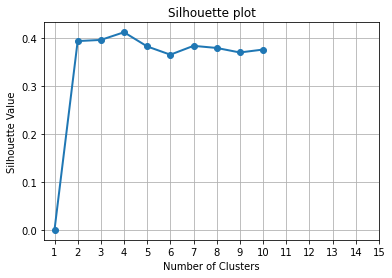

In [ ]:
# Plot the Silhouette metrics versus the number of clusters
plt.plot(nClusters, Silhouette, linewidth = 2, marker = 'o')
plt.xticks(range(1,16,1))
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Value")
plt.title("Silhouette plot")
plt.show()

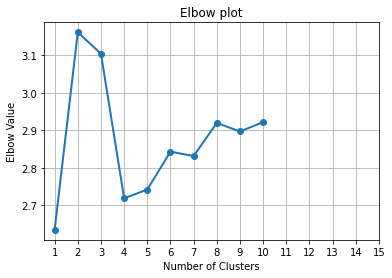

In [ ]:
plt.plot(nClusters, Elbow, linewidth = 2, marker = 'o')
plt.xticks(range(1,16,1))
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow Value")
plt.title("Elbow plot")
plt.show()


In [ ]:
#q18
davies_bouldin = numpy.zeros(10)
for c in range(10):
    KClusters = c + 1
    nClusters[c] = KClusters
    kmeans = cluster.KMeans(n_clusters=KClusters, random_state=20201014).fit(data2)
    if (KClusters > 1):
       davies_bouldin[c] = metrics.davies_bouldin_score(data2, kmeans.labels_)
print("Cluster Size  davies bouldin score\n")
for c in range(10):
   print(nClusters[c],"         ", davies_bouldin[c],)

Cluster Size  davies bouldin score

1.0           0.0
2.0           1.0800113624717425
3.0           0.8661152806612696
4.0           0.7891076057533573
5.0           0.8506266441837786
6.0           0.9325443787931142
7.0           0.8161582731104066
8.0           0.8381851531778952
9.0           0.8543755930824053
10.0           0.8437194618728514


In [ ]:
#q19-20

uploaded = files.upload()
data3= pd.read_csv(io.BytesIO(uploaded['policy_2001.csv']))
data3 = data3[["CLAIM_FLAG","CREDIT_SCORE_BAND","BLUEBOOK_1000","CUST_LOYALTY","MVR_PTS","TIF","TRAVTIME"]]

Y3 = data3[["CLAIM_FLAG"]].astype('category')

catFeature = ['CREDIT_SCORE_BAND']
contFeature = ['BLUEBOOK_1000', 'CUST_LOYALTY', 'MVR_PTS', 'TIF', 'TRAVTIME']
allFeature = catFeature + contFeature

catTarget = 'CLAIM_FLAG'

contMean = data3[[catTarget] + contFeature].groupby(catTarget).mean()

allCombResult = pd.DataFrame()

allComb = []
for r in range(len(allFeature)+1):
   allComb = allComb + list(combinations(allFeature, r))



Saving policy_2001.csv to policy_2001.csv


In [ ]:
def SWEEPOperator (pDim, inputM, tol):
    # pDim: dimension of matrix inputM, integer greater than one
    # inputM: a square and symmetric matrix, numpy array
    # tol: singularity tolerance, positive real

    aliasParam = []
    nonAliasParam = []
    
    A = numpy.copy(inputM)
    diagA = numpy.diagonal(inputM)

    for k in range(pDim):
        Akk = A[k,k]
        if (Akk >= (tol * diagA[k])):
            nonAliasParam.append(k)
            ANext = A - numpy.outer(A[:, k], A[k, :]) / Akk
            ANext[:, k] = A[:, k] / Akk
            ANext[k, :] = ANext[:, k]
            ANext[k, k] = -1.0 / Akk
        else:
            aliasParam.append(k)
            ANext[:,k] = numpy.zeros(pDim)
            ANext[k, :] = numpy.zeros(pDim)
        A = ANext
    return (A, aliasParam, nonAliasParam)

In [ ]:

import statsmodels.api as smodel
nComb = len(allComb)
for r in range(nComb):
   modelTerm = list(allComb[r])
   trainData = data3[[catTarget] + modelTerm].dropna()
   Y = trainData[catTarget].astype('category')

   fullX = smodel.add_constant(trainData, prepend = True)
   fullX = fullX[['const']]
   for pred in modelTerm:
      if (pred in catFeature):
         fullX = fullX.join(pd.get_dummies(trainData[pred].astype('category')))
      elif (pred in contFeature):
         fullX = fullX.join(trainData[pred])

   XtX = numpy.transpose(fullX).dot(fullX)             # The SSCP matrix
   pDim = XtX.shape[0]

   invXtX, aliasParam, nonAliasParam = SWEEPOperator(pDim, XtX, 1.0e-8)

   # The number of free parameters
   modelX = fullX.iloc[:, list(nonAliasParam)]
   objLogit = smodel.MNLogit(Y, modelX)
   thisFit = objLogit.fit(method = 'ncg', maxiter = 200, tol = 1e-8)

   MDF = (thisFit.J - 1) * thisFit.K
   LLK = thisFit.llf

   NSample = len(Y)
   AIC = 2.0 * MDF - 2.0 * LLK
   BIC = MDF * numpy.log(NSample) - 2.0 * LLK
   allCombResult = allCombResult.append([[r, modelTerm, len(modelTerm), LLK, MDF, AIC, BIC, NSample]],
                                          ignore_index = True)
   del objLogit

Optimization terminated successfully.
         Current function value: 0.599327
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 8
         Hessian evaluations: 4
Optimization terminated successfully.
         Current function value: 0.599299
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 10
         Hessian evaluations: 5
Optimization terminated successfully.
         Current function value: 0.595445
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 16
         Hessian evaluations: 8
Optimization terminated successfully.
         Current function value: 0.597491
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 14
         Hessian evaluations: 7
Optimization terminated successfully.
         Current function value: 0.579960
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 8
         Hessian evaluat

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.593796
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 23
         Hessian evaluations: 10
Optimization terminated successfully.
         Current function value: 0.579943
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 23
         Hessian evaluations: 10
Optimization terminated successfully.
         Current function value: 0.576036
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 22
         Hessian evaluations: 10
Optimization terminated successfully.
         Current function value: 0.595111
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 16
         Hessian evaluations: 7
Optimization terminated successfully.
         Current function value: 0.593495
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 18
         He

In [ ]:
allCombResult = allCombResult.rename(
   columns = {0: 'Step', 1: 'Model Term', 2: 'Number of Terms',
              3: 'Log-Likelihood', 4: 'Model Degree of Freedom',
              5: 'Akaike Information Criterion', 6: 'Bayesian Information Criterion',
              7: 'Sample Size'})
allCombResult

,Step,Model Term,Number of Terms,Log-Likelihood,Model Degree of Freedom,Akaike Information Criterion,Bayesian Information Criterion,Sample Size
0,0,[],0,-369.784805,1,741.569610,745.994480,617
1,1,[CREDIT_SCORE_BAND],1,-369.767468,4,747.534936,765.234413,617
2,2,[BLUEBOOK_1000],1,-367.389649,2,738.779297,747.629035,617
3,3,[CUST_LOYALTY],1,-368.652078,2,741.304156,750.153894,617
4,4,[MVR_PTS],1,-357.835403,2,719.670805,728.520543,617
...,...,...,...,...,...,...,...,...
59,59,"[CREDIT_SCORE_BAND, BLUEBOOK_1000, CUST_LOYALT...",5,-363.545456,8,743.090912,778.489864,617
60,60,"[CREDIT_SCORE_BAND, BLUEBOOK_1000, MVR_PTS, TI...",5,-353.286721,8,722.573442,757.972395,617
61,61,"[CREDIT_SCORE_BAND, CUST_LOYALTY, MVR_PTS, TIF...",5,-354.575723,8,725.151447,760.550399,617
62,62,"[BLUEBOOK_1000, CUST_LOYALTY, MVR_PTS, TIF, TR...",5,-352.577525,6,717.155050,743.704264,617


In [ ]:
allCombResult = allCombResult[[r, modelTerm, len(modelTerm), LLK, MDF, AIC, BIC, NSample]],
                                          ignore_index = True)

,Step,Model Term,Number of Terms,Log-Likelihood,Model Degree of Freedom,Akaike Information Criterion,Bayesian Information Criterion,Sample Size
0,0,[],0,-369.784805,1,741.569610,745.994480,617
1,1,[CREDIT_SCORE_BAND],1,-369.767468,4,747.534936,765.234413,617
2,2,[BLUEBOOK_1000],1,-367.389649,2,738.779297,747.629035,617
3,3,[CUST_LOYALTY],1,-368.652078,2,741.304156,750.153894,617
4,4,[MVR_PTS],1,-357.835403,2,719.670805,728.520543,617
...,...,...,...,...,...,...,...,...
59,59,"[CREDIT_SCORE_BAND, BLUEBOOK_1000, CUST_LOYALT...",5,-363.545456,8,743.090912,778.489864,617
60,60,"[CREDIT_SCORE_BAND, BLUEBOOK_1000, MVR_PTS, TI...",5,-353.286721,8,722.573442,757.972395,617
61,61,"[CREDIT_SCORE_BAND, CUST_LOYALTY, MVR_PTS, TIF...",5,-354.575723,8,725.151447,760.550399,617
62,62,"[BLUEBOOK_1000, CUST_LOYALTY, MVR_PTS, TIF, TR...",5,-352.577525,6,717.155050,743.704264,617


In [ ]:
allCombResult[allCombResult['Akaike Information Criterion'] == min(aic['Akaike Information Criterion'])]['Model Term']

36    [BLUEBOOK_1000, MVR_PTS, TRAVTIME]
Name: Model Term, dtype: object

In [ ]:
bic = allCombResult[allCombResult['Akaike Information Criterion'] == min(aic['Akaike Information Criterion'])]['Bayesian Information Criterion']

bic

36    732.568322
Name: Bayesian Information Criterion, dtype: float64